## Visualization

Visualizing scRNA-seq data is the process of projecting a high-dimensional matrix of cells and genes into a few coordinates such that every cell is meaningfully represented in a two-dimensional graph. 
Overall t-SNE visualizations have been very popular in the community, however the recent UMAP algorithm has been shown to better represent the topology of the data.

Note that we do scale the genes to have zero mean and unit variance before run pca.

In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
from gprofiler import GProfiler
import rpy2.rinterface_lib.callbacks
import logging
from rpy2.robjects import pandas2ri
import anndata2ri
import doubletdetection as dd
from gseapy.plot import barplot, dotplot
import os, sys
import gseapy as gp
from anndata import AnnData

import scipy.stats
import diffxpy.api as de
import anndata
from batchglm.api.models.tf1.glm_nb import Simulator

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()


plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 0   # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=200, dpi_save=300, facecolor='white')
sc.logging.print_versions()
sc.logging.print_header()

# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
%load_ext rpy2.ipython

%matplotlib inline

plt.rcParams.update({'font.size': 22})

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

-----
anndata     0.7.5
scanpy      1.6.1
sinfo       0.3.1
-----
Crypto                              3.10.1
OpenSSL                             20.0.1
PIL                                 8.1.0
absl                                NA
anndata                             0.7.5
anndata2ri                          1.0.6
anyio                               NA
appdirs                             1.4.4
astunparse                          1.6.3
attr                                21.2.0
babel                               2.9.0
backcall                            0.2.0
batchglm                            v0.7.4
bcrypt                              3.2.0
bioservices                         1.7.11
boto3                               1.17.107
botocore                            1.20.107
brotli                              NA
bs4                                 4.9.3
cairo                               1.20.0
certifi                             2021.05.30
cffi                                1.14.4
c

In [2]:
%%R
# Load libraries from correct lib Paths for my environment - ignore this!
#.libPaths("/home/dan/R/x86_64-pc-linux-gnu-library/4.03")
#Sys.setenv(R_INSTALL_STAGED = FALSE)

#sudo apt-get install aptitude

#sudo apt-get install libcurl4-openssl-dev

#sudo apt-get install libxml2-dev

# Load all the R libraries we will be using in the notebook
library(scran)
library(RColorBrewer)
#library(slingshot)
#library(monocle)
#library(gam)
library(clusterExperiment)
library(ggplot2)
library(plyr)
library(MAST)
#library(scCB2)
#library(DropletUtils)
library(Seurat)
library(NMF)
library(BiocFileCache)

In [3]:
import pickle

# Getting back the objects:
with open('adata_highly_variable.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    adata = pickle.load(f)

In [4]:
sc.pp.scale(adata, zero_center=True, max_value=None, copy=False, layer=None, obsm=None)

In [5]:
np.mean(adata.X, axis = 0)

array([ 3.4551475e-05,  2.3585108e-05,  6.9353172e-07, ...,
       -4.3403111e-07,  9.7977681e-06,  4.2815241e-06], dtype=float32)

In [6]:
np.std(adata.X, axis = 0)

array([0.9998732 , 0.99993753, 1.0002148 , ..., 0.99982184, 0.9999781 ,
       0.99995697], dtype=float32)

In [7]:
import pickle

# obj0, obj1, obj2 are created here...

# Saving the objects:
with open('adata_scaled_zscore.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(adata, f)

In [56]:
import pickle

# Getting back the objects:
with open('adata_scaled_zscore.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    adata = pickle.load(f)

In [57]:
# Calculate the visualizations
sc.pp.pca(adata, n_comps=100, use_highly_variable=True, svd_solver='arpack')

/home/dan/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [58]:
adata.uns['pca']['variance_ratio']/0.46006063

array([0.1645996 , 0.12535211, 0.08608161, 0.07397407, 0.04088791,
       0.03931084, 0.02617863, 0.02278914, 0.02159579, 0.02043704,
       0.02022809, 0.01943077, 0.01880929, 0.01690345, 0.01539867,
       0.01509328, 0.01418173, 0.01374231, 0.01262858, 0.01242534,
       0.01202041, 0.01160378, 0.01082197, 0.01074283, 0.01051516,
       0.00938572, 0.00920354, 0.00872208, 0.00844102, 0.00828172,
       0.00781942, 0.00766574, 0.00753434, 0.00702285, 0.00675823,
       0.00670464, 0.00654157, 0.00617937, 0.00609147, 0.00601004,
       0.00568177, 0.00565055, 0.0055265 , 0.00544062, 0.00543193,
       0.00516856, 0.00488903, 0.00483346, 0.00469216, 0.004571  ,
       0.00452758, 0.00446597, 0.00440454, 0.00430644, 0.00424611,
       0.00413971, 0.00409321, 0.00399702, 0.00394921, 0.00385164,
       0.00383805, 0.0038103 , 0.00370075, 0.0036147 , 0.00358141,
       0.00354829, 0.00348903, 0.00345496, 0.00339911, 0.00336286,
       0.00332564, 0.00330687, 0.00330063, 0.00324734, 0.00319

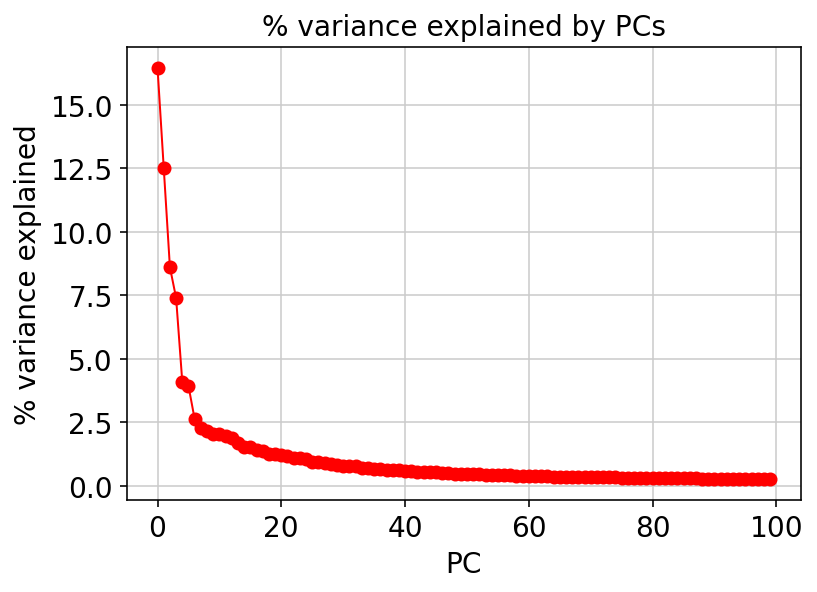

In [59]:
# Cumulative variance explained:
var_explained = adata.uns['pca']['variance_ratio']*100/0.46006063
x = range(len(adata.uns['pca']['variance_ratio']))
y = var_explained
plt.plot(x, y, 'ro-', linewidth=1)
plt.xlabel('PC')
plt.ylabel('% variance explained')
plt.title('% variance explained by PCs')
plt.savefig('./figures/variance_explained_percent.png', facecolor='w', edgecolor='w')
plt.show()

In [60]:
np.cumsum(adata.uns['pca']['variance_ratio'])

array([0.07572579, 0.13339537, 0.17299813, 0.20703068, 0.2258416 ,
       0.24392697, 0.25597072, 0.2664551 , 0.2763905 , 0.28579277,
       0.2950989 , 0.30403823, 0.31269163, 0.32046825, 0.32755256,
       0.33449638, 0.34102082, 0.34734312, 0.35315302, 0.35886943,
       0.36439955, 0.36973798, 0.37471673, 0.3796591 , 0.3844967 ,
       0.3888147 , 0.39304888, 0.39706156, 0.40094495, 0.40475506,
       0.40835246, 0.41187918, 0.41534543, 0.41857636, 0.42168555,
       0.4247701 , 0.42777961, 0.4306225 , 0.43342492, 0.4361899 ,
       0.43880385, 0.44140345, 0.44394597, 0.44644898, 0.448948  ,
       0.45132583, 0.45357507, 0.45579877, 0.45795745, 0.4600604 ,
       0.46214336, 0.46419796, 0.4662243 , 0.46820554, 0.47015902,
       0.47206354, 0.47394666, 0.47578552, 0.4776024 , 0.47937438,
       0.4811401 , 0.48289308, 0.48459566, 0.48625863, 0.48790628,
       0.4895387 , 0.49114385, 0.49273336, 0.49429715, 0.49584427,
       0.49737427, 0.49889562, 0.50041413, 0.5019081 , 0.50337

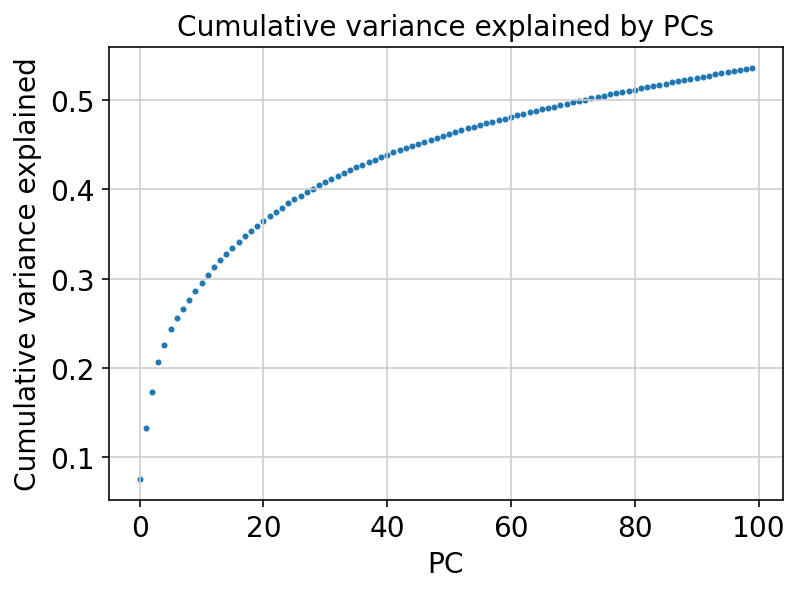

In [61]:
# Cumulative variance explained:
cml_var_explained = np.cumsum(adata.uns['pca']['variance_ratio'])
x = range(len(adata.uns['pca']['variance_ratio']))
y = cml_var_explained
plt.scatter(x, y, s=4)
plt.xlabel('PC')
plt.ylabel('Cumulative variance explained')
plt.title('Cumulative variance explained by PCs')
plt.savefig('./figures/Cumulative_variance_explained2.png', facecolor='w', edgecolor='w')
plt.show()

### Visualization

In [69]:
sc.pp.neighbors(adata, n_neighbors=50, n_pcs = 10)

In [70]:
sc.tl.umap(adata, min_dist = 0.3)

In [72]:
adata.obsm["X_umap"] = adata.obsm["X_umap"] * (-1)

In [74]:
import pickle

# obj0, obj1, obj2 are created here...

# Saving the objects:
with open('adata_pca_umap.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(adata, f)

In [ ]:
import pickle

# Getting back the objects:
with open('adata_pca_umap.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    adata = pickle.load(f)

In [75]:
adata.var

,gene_id,2,n_cells,highly_variable,means,dispersions,dispersions_norm,mean,std
EGFP3UTR,EGFP3UTR,Gene Expression,9304,True,0.245906,1.427165,8.125310,0.245906,0.592409
EGFP,EGFP,Gene Expression,10407,False,0.153405,0.834939,1.499609,0.153405,0.357888
CreERT2,CreERT2,Gene Expression,163,False,0.003175,1.236385,3.410800,0.003175,0.062651
EYFP,EYFP,Gene Expression,6591,True,0.261973,2.531236,19.763681,0.261973,0.814319
hETV4,hETV4,Gene Expression,720,False,0.010206,1.186699,3.145723,0.010206,0.110053
...,...,...,...,...,...,...,...,...,...
AC168977.2,AC168977.2,Gene Expression,14,False,0.000167,0.733450,-0.387120,0.000167,0.011059
AC168977.1,AC168977.1,Gene Expression,167,False,0.001918,0.858370,0.165852,0.001918,0.040580
AC149090.1,AC149090.1,Gene Expression,7544,False,0.114098,0.929673,2.726850,0.114098,0.325690
CAAA01118383.1,CAAA01118383.1,Gene Expression,12212,False,0.158647,0.676830,-0.454938,0.158647,0.327685


### Check the batch effect

In [35]:
adata.obs

,sample,age,batch,genotype_age,n_counts,log_counts,n_genes,mt_frac,doublet,doublet_score,S_score,G2M_score,phase
AAACCTGGTGAGTGAC,TY,2weeks,1,TY_2weeks,2021.0,7.668561,941,0.055607,0.0,3.920398e-46,-0.026715,-0.119354,G1
AAATGCCAGAAGATTC,TY,2weeks,1,TY_2weeks,1515.0,7.372746,759,0.048367,0.0,3.920398e-46,-0.023157,-0.119676,G1
AAGACCTGTGAAAGAG,TY,2weeks,1,TY_2weeks,1638.0,7.427739,863,0.026159,0.0,1.090523e-68,-0.029725,0.066830,G2M
AATCCAGAGAGGTAGA,TY,2weeks,1,TY_2weeks,3136.0,8.070906,1497,0.020000,0.0,1.752931e-44,0.013308,-0.051707,S
ACACCAAAGCGTGAGT,TY,2weeks,1,TY_2weeks,2637.0,7.939159,1209,0.059893,0.0,2.543456e+02,0.109774,-0.120863,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTCGTCAGTAGAGTGC,E4Ap53,4months,3,E4Ap53_4months,8311.0,9.038959,2002,0.012938,0.0,1.286236e-02,-0.036352,-0.061798,G1
ATCCGAAAGGTGTGGT-1,E4Ap53,4months,3,E4Ap53_4months,6088.0,8.810460,1063,0.091885,0.0,5.653162e+00,0.041644,-0.104738,S
CCCAGTTAGGTACTCT,E4Ap53,4months,3,E4Ap53_4months,7895.0,9.002332,1357,0.027826,0.0,7.421237e+00,-0.028125,-0.104002,G1
TGCGTGGAGTGGTCCC,E4Ap53,4months,3,E4Ap53_4months,6009.0,8.826881,2361,0.118269,0.0,1.392403e-01,-0.060195,-0.007737,G1


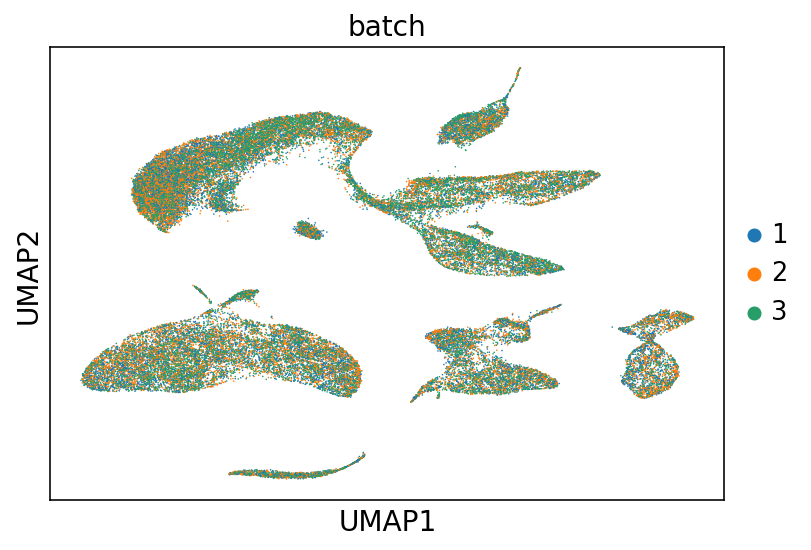

In [76]:
sc.pl.umap(adata, color='batch', use_raw=False, save='batch_3.pdf')

The batch effect is negligible, so we do not need batch correction.